# Analysing lyrics through the decades

### First import the data that has already been scraped, looked up and tidied

In [68]:
import pickle, re, pandas as pd
with open('final_lyrics_dump.pickle', 'rb') as lyrics_file:
    lyrics_array = pickle.load(lyrics_file)

df = pd.DataFrame.from_records(lyrics_array)
#getting rid of the descriptions of verses and choruses in the lyrics
df["Lyrics"] = df.apply(lambda x: re.sub(r'\[[^\]]*\]', '', x["Lyrics"]), axis=1)
#getting rid of the newlines in the lyrics
df["Just_Lyrics"] = df.apply(lambda x: re.sub(r'\n', ' ', x["Lyrics"]), axis=1)
#getting rid of the punctuation in the lyrics
df["Just_Lyrics"] = df.apply(lambda x: re.sub(r'[^\w\s]', '', x["Just_Lyrics"]), axis=1)
#making the lyrics lowercase in a new column (in case I need case later)
df["Just_Lower_Lyrics"] = df.apply(lambda x: x["Just_Lyrics"].lower(), axis=1)
df["Lyrics_List"] = df.apply(lambda x: x["Just_Lower_Lyrics"].split(), axis=1)
df.head(10)

,Song title,Artist,Year,Lyrics,Just_Lyrics,Just_Lower_Lyrics,Lyrics_List
0,Poor Little Fool,Ricky Nelson,1958,I used to play around with hearts\nThat hasten...,I used to play around with hearts That hastene...,i used to play around with hearts that hastene...,"[i, used, to, play, around, with, hearts, that..."
1,Little Star,The Elegants,1958,Where are you little star?\n(Where are you?)\n...,Where are you little star Where are you Whoa ...,where are you little star where are you whoa ...,"[where, are, you, little, star, where, are, yo..."
2,It's All in the Game,Tommy Edwards,1958,Many a tear have to fall\nBut it's all in the ...,Many a tear have to fall But its all in the ga...,many a tear have to fall but its all in the ga...,"[many, a, tear, have, to, fall, but, its, all,..."
3,It's Only Make Believe,Conway Twitty,1958,People see us everywhere\nThey think you reall...,People see us everywhere They think you really...,people see us everywhere they think you really...,"[people, see, us, everywhere, they, think, you..."
4,Tom Dooley,The Kingston Trio,1958,"\nThroughout history, there have been many son...",Throughout history there have been many songs...,throughout history there have been many songs...,"[throughout, history, there, have, been, many,..."
5,To Know Him Is to Love Him,The Teddy Bears,1958,"\nTo know, know, know him\nIs to love, love, l...",To know know know him Is to love love love hi...,to know know know him is to love love love hi...,"[to, know, know, know, him, is, to, love, love..."
6,Smoke Gets in Your Eyes,The Platters,1959,\nThey asked me how I knew\nMy true love was t...,They asked me how I knew My true love was tru...,they asked me how i knew my true love was tru...,"[they, asked, me, how, i, knew, my, true, love..."
7,Stagger Lee,Lloyd Price,1959,The night was clear and the moon was yellow\nA...,The night was clear and the moon was yellow An...,the night was clear and the moon was yellow an...,"[the, night, was, clear, and, the, moon, was, ..."
8,Venus,Frankie Avalon,1959,"\nHey, Venus!\nOh, Venus!\n\n\nVenus! If you w...",Hey Venus Oh Venus Venus If you will Please...,hey venus oh venus venus if you will please...,"[hey, venus, oh, venus, venus, if, you, will, ..."
9,Come Softly to Me,The Fleetwoods,1959,"\nDoo dooby doo\nDum dum, dum doo dum, dooby d...",Doo dooby doo Dum dum dum doo dum dooby doo D...,doo dooby doo dum dum dum doo dum dooby doo d...,"[doo, dooby, doo, dum, dum, dum, doo, dum, doo..."


### Make the counts of words


In [69]:
def word_count(row):
    # Count the Number of Occurrences in a Python list using Counter
    lyrics_list = row["Lyrics_List"]
    from collections import Counter
    lyric_count_dict = Counter(lyrics_list)
    return lyric_count_dict

df["Lyrics_Count"] = df.apply(word_count, axis=1)
df.sample(10)

,Song title,Artist,Year,Lyrics,Just_Lyrics,Just_Lower_Lyrics,Lyrics_List,Lyrics_Count
965,Say It Right,Nelly Furtado,2007,\nFrk-frk-down\nHey\nYou don't mean nothin' at...,Frkfrkdown Hey You dont mean nothin at all to...,frkfrkdown hey you dont mean nothin at all to...,"[frkfrkdown, hey, you, dont, mean, nothin, at,...","{'frkfrkdown': 1, 'hey': 29, 'you': 24, 'dont'..."
421,Le Freak,Chic,1978,"\nAh, freak out\nLe freak, c'est chic\nFreak o...",Ah freak out Le freak cest chic Freak out Ah ...,ah freak out le freak cest chic freak out ah ...,"[ah, freak, out, le, freak, cest, chic, freak,...","{'ah': 7, 'freak': 27, 'out': 16, 'le': 8, 'ce..."
510,Out of Touch,Daryl Hall and John Oates,1984,"\nHey, y'all, whoo!\nI don't care if you got n...",Hey yall whoo I dont care if you got no legs ...,hey yall whoo i dont care if you got no legs ...,"[hey, yall, whoo, i, dont, care, if, you, got,...","{'hey': 1, 'yall': 1, 'whoo': 1, 'i': 1, 'dont..."
375,"(Shake, Shake, Shake) Shake Your Booty",KC and the Sunshine Band,1976,"\nAh everybody, get on the floor, and let's da...",Ah everybody get on the floor and lets dance ...,ah everybody get on the floor and lets dance ...,"[ah, everybody, get, on, the, floor, and, lets...","{'ah': 4, 'everybody': 1, 'get': 1, 'on': 2, '..."
626,Lost in Your Eyes,Debbie Gibson,1989,\nI get lost in your eyes\nAnd I feel my spiri...,I get lost in your eyes And I feel my spirits...,i get lost in your eyes and i feel my spirits...,"[i, get, lost, in, your, eyes, and, i, feel, m...","{'i': 15, 'get': 3, 'lost': 8, 'in': 10, 'your..."
722,Again,Janet Jackson,1993,\nI heard from a friend today\nAnd she said yo...,I heard from a friend today And she said you ...,i heard from a friend today and she said you ...,"[i, heard, from, a, friend, today, and, she, s...","{'i': 8, 'heard': 1, 'from': 2, 'a': 4, 'frien..."
122,Game of Love,Wayne Fontana & The Mindbenders,1965,The purpose of a man is to love a woman\nAnd t...,The purpose of a man is to love a woman And th...,the purpose of a man is to love a woman and th...,"[the, purpose, of, a, man, is, to, love, a, wo...","{'the': 21, 'purpose': 6, 'of': 19, 'a': 12, '..."
229,My Sweet Lord,George Harrison,1970,"My sweet Lord\nHm, my Lord\nHm, my Lord\nI rea...",My sweet Lord Hm my Lord Hm my Lord I really w...,my sweet lord hm my lord hm my lord i really w...,"[my, sweet, lord, hm, my, lord, hm, my, lord, ...","{'my': 49, 'sweet': 14, 'lord': 40, 'hm': 21, ..."
500,Time After Time,Cyndi Lauper,1984,"\nLyin' in my bed, I hear the clock tick and t...",Lyin in my bed I hear the clock tick and thin...,lyin in my bed i hear the clock tick and thin...,"[lyin, in, my, bed, i, hear, the, clock, tick,...","{'lyin': 1, 'in': 2, 'my': 2, 'bed': 1, 'i': 1..."
333,Have You Never Been Mellow,Olivia Newton-John,1975,\nThere was a time when I was\nIn a hurry as y...,There was a time when I was In a hurry as you...,there was a time when i was in a hurry as you...,"[there, was, a, time, when, i, was, in, a, hur...","{'there': 2, 'was': 7, 'a': 5, 'time': 2, 'whe..."


In [70]:
import spacy

In [71]:
#keeping track of how many times I've run this function
import math
counter = 0

def syllable_count(word):
    #thank you to Michael Holtzscher https://medium.com/@mholtzscher/programmatically-counting-syllables-ca760435fab4
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

def get_sentences(row):
    nlp = spacy.load('en_core_web_sm')
    lyrics = nlp(row["Lyrics"])
    return len(list(lyrics.sents))

def get_sentences_alt(row):
    #if the spacy sentence finder does't work, use this as an approximation, number of lines divided by 2
    return math.ceil(len(row["Lyrics"].split("\n"))/2)

def get_words(row):
    return len(row["Lyrics_List"])

def get_syllables(row):
    syllables = 0
    words = row["Lyrics_List"]
    for word in words:
        syllables += syllable_count(word)
    return syllables

def reading_age_FK(row):
    #Flesch Kincade calculation 
    #Formula 206.835 − 1.015*(total words/total sentences) − 84.6*(total syllables/total words)
    #https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
    global counter
    counter += 1
    print(counter)
    words = get_words(row)
    sentences = get_sentences_alt(row)
    return 206.35 - 1.015*(words/sentences) - 84.6*(get_syllables(row)/words)



In [72]:
df["Reading_Age"] = df.apply(reading_age_FK, axis=1)
df.sample(10)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,Song title,Artist,Year,Lyrics,Just_Lyrics,Just_Lower_Lyrics,Lyrics_List,Lyrics_Count,Reading_Age
417,Hot Child in the City,Nick Gilder,1978,\n\n\nDanger in the shape of something wild\nS...,Danger in the shape of something wild Stran...,danger in the shape of something wild stran...,"[danger, in, the, shape, of, something, wild, ...","{'danger': 1, 'in': 20, 'the': 20, 'shape': 1,...",94.680000
707,Save the Best for Last,Vanessa Williams,1992,\nSometimes the snow comes down in June\nSomet...,Sometimes the snow comes down in June Sometim...,sometimes the snow comes down in june sometim...,"[sometimes, the, snow, comes, down, in, june, ...","{'sometimes': 7, 'the': 17, 'snow': 2, 'comes'...",93.420383
449,It's Still Rock and Roll to Me,Billy Joel,1980,\nWhat's the matter with the clothes I'm weari...,Whats the matter with the clothes Im wearing ...,whats the matter with the clothes im wearing ...,"[whats, the, matter, with, the, clothes, im, w...","{'whats': 3, 'the': 15, 'matter': 4, 'with': 3...",92.270845
1052,Happy,Pharrell Williams,2014,\n\n\nIt might seem crazy what I'm 'bout to sa...,It might seem crazy what Im bout to say Sun...,it might seem crazy what im bout to say sun...,"[it, might, seem, crazy, what, im, bout, to, s...","{'it': 2, 'might': 1, 'seem': 1, 'crazy': 1, '...",88.072788
1023,"Too Much, Too Little, Too Late",Johnny Mathis and Deniece Williams,1978,"Guess it's over, call it a day\nSorry that it ...",Guess its over call it a day Sorry that it had...,guess its over call it a day sorry that it had...,"[guess, its, over, call, it, a, day, sorry, th...","{'guess': 3, 'its': 13, 'over': 13, 'call': 1,...",92.706639
558,True Colors,Cyndi Lauper,1986,\nYou with the sad eyes\nDon't be discouraged\...,You with the sad eyes Dont be discouraged Oh ...,you with the sad eyes dont be discouraged oh ...,"[you, with, the, sad, eyes, dont, be, discoura...","{'you': 18, 'with': 1, 'the': 2, 'sad': 1, 'ey...",94.825525
985,Touch My Body,Mariah Carey,2008,"\nMC!\nUh, uh, uh, in the place to be\nOh yeah...",MC Uh uh uh in the place to be Oh yeah oh yea...,mc uh uh uh in the place to be oh yeah oh yea...,"[mc, uh, uh, uh, in, the, place, to, be, oh, y...","{'mc': 1, 'uh': 4, 'in': 10, 'the': 12, 'place...",88.820572
822,Thrift Shop,Macklemore & Ryan Lewis featuring Wanz,2013,"\nHey, Macklemore, can we go thrift shopping?\...",Hey Macklemore can we go thrift shopping What...,hey macklemore can we go thrift shopping what...,"[hey, macklemore, can, we, go, thrift, shoppin...","{'hey': 1, 'macklemore': 1, 'can': 3, 'we': 1,...",76.380300
504,What's Love Got to Do with It,Tina Turner,1984,"\nYou must understand, oh, the touch of your h...",You must understand oh the touch of your hand...,you must understand oh the touch of your hand...,"[you, must, understand, oh, the, touch, of, yo...","{'you': 4, 'must': 2, 'understand': 1, 'oh': 4...",94.597486
648,Listen to Your Heart,Roxette,1989,\nI know there's something in the wake of your...,I know theres something in the wake of your s...,i know theres something in the wake of your s...,"[i, know, theres, something, in, the, wake, of...","{'i': 10, 'know': 9, 'theres': 5, 'something':...",94.494431


### Store processed data for later use.

In [73]:
#Make a pickle of the dataframe
with open('final_lyrics_dataframe.pickle', 'wb') as out_file:
    pickle.dump(df, out_file, protocol=pickle.HIGHEST_PROTOCOL)

### Check it on a graph

<AxesSubplot:xlabel='Year', ylabel='Reading_Age'>

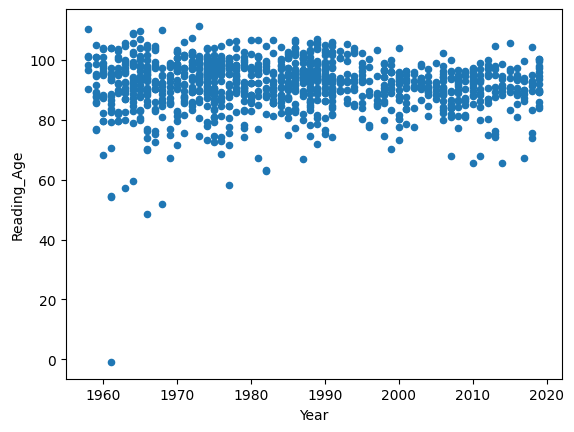

In [74]:
#Graph the dataframe by year and reading age
df.plot.scatter(x="Year", y="Reading_Age")

In [107]:
df[df["Reading_Age"].le(10)]

,Song title,Artist,Year,Lyrics,Just_Lyrics,Just_Lower_Lyrics,Lyrics_List,Lyrics_Count,Reading_Age,decade
57,The Lion Sleeps Tonight,The Tokens,1961,"\nWeeheeheehee, dee heeheeheehee, weeoh aweem ...",Weeheeheehee dee heeheeheehee weeoh aweem awa...,weeheeheehee dee heeheeheehee weeoh aweem awa...,"[weeheeheehee, dee, heeheeheehee, weeoh, aweem...","{'weeheeheehee': 9, 'dee': 9, 'heeheeheehee': ...",-0.861623,1960


In [108]:
df[df["Reading_Age"].ge(100)]

,Song title,Artist,Year,Lyrics,Just_Lyrics,Just_Lower_Lyrics,Lyrics_List,Lyrics_Count,Reading_Age,decade
0,Poor Little Fool,Ricky Nelson,1958,I used to play around with hearts\nThat hasten...,I used to play around with hearts That hastene...,i used to play around with hearts that hastene...,"[i, used, to, play, around, with, hearts, that...","{'i': 18, 'used': 1, 'to': 2, 'play': 2, 'arou...",100.877072,1950
1,Little Star,The Elegants,1958,Where are you little star?\n(Where are you?)\n...,Where are you little star Where are you Whoa ...,where are you little star where are you whoa ...,"[where, are, you, little, star, where, are, yo...","{'where': 5, 'are': 8, 'you': 8, 'little': 5, ...",101.417771,1950
5,To Know Him Is to Love Him,The Teddy Bears,1958,"\nTo know, know, know him\nIs to love, love, l...",To know know know him Is to love love love hi...,to know know know him is to love love love hi...,"[to, know, know, know, him, is, to, love, love...","{'to': 14, 'know': 13, 'him': 15, 'is': 5, 'lo...",110.384940,1950
8,Venus,Frankie Avalon,1959,"\nHey, Venus!\nOh, Venus!\n\n\nVenus! If you w...",Hey Venus Oh Venus Venus If you will Please...,hey venus oh venus venus if you will please...,"[hey, venus, oh, venus, venus, if, you, will, ...","{'hey': 2, 'venus': 10, 'oh': 2, 'if': 3, 'you...",100.840761,1950
17,Mr. Blue,The Fleetwoods,1959,\nOur guardian star lost all his glow the day ...,Our guardian star lost all his glow the day t...,our guardian star lost all his glow the day t...,"[our, guardian, star, lost, all, his, glow, th...","{'our': 1, 'guardian': 1, 'star': 1, 'lost': 3...",105.023787,1950
...,...,...,...,...,...,...,...,...,...,...
1037,Take On Me,a-ha,1985,\nWe're talking away\nI don't know what I'm to...,Were talking away I dont know what Im to say ...,were talking away i dont know what im to say ...,"[were, talking, away, i, dont, know, what, im,...","{'were': 1, 'talking': 1, 'away': 5, 'i': 1, '...",101.025319,1980
1038,The Way It Is,Bruce Hornsby & the Range,1986,"\n\n\nStanding in line, marking time\nWaiting ...",Standing in line marking time Waiting for t...,standing in line marking time waiting for t...,"[standing, in, line, marking, time, waiting, f...","{'standing': 1, 'in': 3, 'line': 2, 'marking':...",103.822008,1980
1042,To Be With You,Mr. Big,1991,"\nHold on, little girl\nShow me what he's done...",Hold on little girl Show me what hes done to ...,hold on little girl show me what hes done to ...,"[hold, on, little, girl, show, me, what, hes, ...","{'hold': 2, 'on': 16, 'little': 3, 'girl': 2, ...",102.636469,1990
1046,My Heart Will Go On,Celine Dion,1995,"\nEvery night in my dreams\nI see you, I feel ...",Every night in my dreams I see you I feel you...,every night in my dreams i see you i feel you...,"[every, night, in, my, dreams, i, see, you, i,...","{'every': 1, 'night': 1, 'in': 5, 'my': 9, 'dr...",102.240000,1990


In [76]:
#checking the reading age formula
row = df.iloc[0]
#print(row["Lyrics"])

print(reading_age_FK(row))
print(get_sentences(row))
print(get_sentences_alt(row))
print(get_words(row))
print(get_syllables(row))
print(row["Lyrics"])
print(row["Lyrics_List"])
syllables = 0
words = row["Lyrics_List"]
vowels = 'aeiouy'
for word in words:
    syllable_count = 0
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    syllables += syllable_count
    print(word, syllable_count)
print(syllables)

1071
100.8770720326626
24
27
254
288
I used to play around with hearts
That hastened at my call
But when I met that little girl
I knew that I would fall

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

She played around and teased me
With her carefree devil eyes
She'd hold me close and kiss me
But her heart was full of lies

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

She told me how she cared for me
And that we'd never part
And so for the very first time
I gave away my heart

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)
 The next day she was gone
And I knew she'd lied to me
She left me with a broken heart
And won her victory

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

Well, I'd played this game with other hearts
But I never thought I'd see
The day that someone else would play
L

In [ ]:
206.35 - 1.015*(257/5) - 84.6*(293/257)

57.72841634241246

In [77]:
import numpy as np
import pandas as pd
import pickle
with open('final_lyrics_dataframe.pickle', 'rb') as in_file:
    df = pickle.load(in_file)


df['decade'] = (df['Year'] // 10) * 10

by_decade = df.groupby(by='decade', group_keys=True).agg(
    Lyrics_List=pd.NamedAgg(column='Lyrics_List', aggfunc='sum'),
    mean_reading_age=pd.NamedAgg(column='Reading_Age', aggfunc='mean'),
)


by_decade = by_decade.reset_index()
by_decade

,decade,Lyrics_List,mean_reading_age
0,1950,"[i, used, to, play, around, with, hearts, that...",93.512622
1,1960,"[vocalizations, on, the, bank, of, the, river,...",90.074141
2,1970,"[raindrops, are, falling, on, my, head, and, j...",92.662824
3,1980,"[i, love, you, yeah, babe, i, love, you, so, i...",92.775025
4,1990,"[i, could, hardly, believe, it, when, i, heard...",92.442806
5,2000,"[what, a, girl, wants, what, a, girl, needs, w...",89.670443
6,2010,"[wake, up, in, the, morning, feelin, like, p, ...",90.428678


<AxesSubplot:xlabel='decade', ylabel='mean_reading_age'>

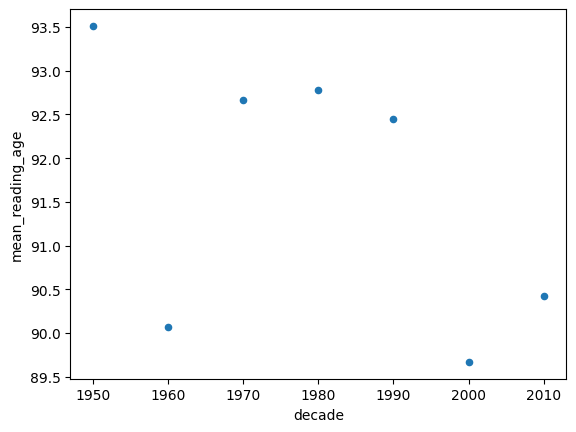

In [84]:
#Graph the dataframe by decade and reading age
by_decade.plot.scatter(x="decade", y="mean_reading_age")

In [80]:
by_year = df.groupby(by='Year', group_keys=True).agg(
    all_words=pd.NamedAgg(column='Lyrics_List', aggfunc='sum'),
    mean_reading_age=pd.NamedAgg(column='Reading_Age', aggfunc='mean'),
)
by_year = by_year.reset_index()
by_year.to_csv("by_year.csv")
by_decade.to_csv("by_decade.csv")

<AxesSubplot:xlabel='Year', ylabel='mean_reading_age'>

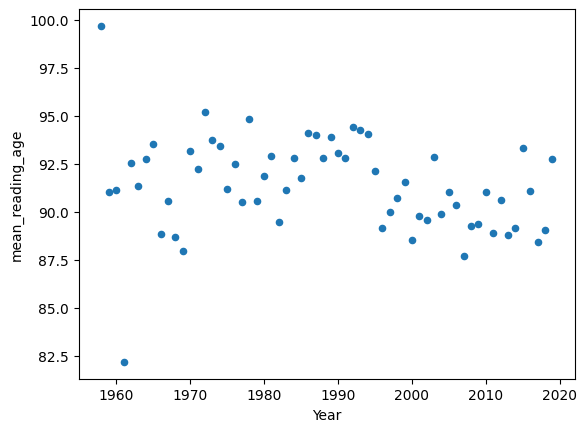

In [85]:
#Graph the dataframe by year and reading age
by_year.plot.scatter(x="Year", y="mean_reading_age")

In [ ]:
with open("1950.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[0]["all_words"]))
with open("1960.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[1]["all_words"]))
with open("1970.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[2]["all_words"]))
with open("1980.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[3]["all_words"]))
with open("1990.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[4]["all_words"]))
with open("2000.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[5]["all_words"]))
with open("2010.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[6]["all_words"]))


In [ ]:
#Make some visualisations
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
dec = 50
for row in by_decade["all_words"]:
  text = " ".join(x for x in row)
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # plt.figure( figsize=(15,10))
  # plt.imshow(wordcloud, interpolation='bilinear')
  # plt.axis("off")
  # plt.show()
  with open(f"wordcloud{dec}.svg", "w") as file:
    file.write(wordcloud.to_svg())
  dec += 10

## Viewing the decades of word clouds:

### The 1960s
<img src="wordcloud60.svg" width="800px">

### The 1970s
<img src="wordcloud70.svg" width="800px">

### The 1980s
<img src="wordcloud80.svg" width="800px">

### The 1990s
<img src="wordcloud90.svg" width="800px">

### The 2000s
<img src="wordcloud00.svg" width="800px">

### The 2010s
<img src="wordcloud10.svg" width="800px">

## Nonsense Words

In [106]:
#get words from the internet and split into a set.
word_set = set()
with open("words.txt", "r") as file:
    credit = file.readline()
    for line in file:
        word_set.add(line.strip())

by_decade["Lyrics_Count"] = by_decade.apply(word_count, axis=1)

def nonsense_words(row):
    nonsense = {}
    for word in row["Lyrics_Count"]:
        if word not in word_set:
            nonsense[word] = row["Lyrics_Count"][word]
    return nonsense

by_decade["nonsense"] =  by_decade.apply(nonsense_words, axis=1)
by_decade_nonsense = by_decade[["decade", "nonsense"]]
#send to csv
by_decade_nonsense.to_csv("by_decade_nonsense.csv")


by_decade

i 161
a 101
uh 17
ratta 8
youre 15
im 28
thinkin 1
whoah 1
woa 1
ra 1
youll 5
grayson 2
dooley 14
hadnta 1
ida 1
tennessee 1
hangin 1
theyll 1
ahh 4
ohhh 1
fortyfour 2
oooh 5
wah 4
ahhh 1
dont 7
thathey 1
venus 10
doo 48
dooby 36
dum 92
ive 10
ooo 1
kansas 10
gonna 8
gotta 1
thats 10
1814 1
jackson 1
mississip 1
british 6
orleans 1
acomin 4
wasnt 4
runnin 4
mississippi 6
mexico 6
huttwo 4
threefour 3
ofem 1
beatin 1
didnt 2
twothreefour 5
onehut 3
onehuptwo 1
huptwothreefour 4
huptwo 4
couldnt 4
onetwothreefour 3
onetwo 1
gator 1
huponetwo 1
nothin 3
aint 6
biga 9
o 7
macheath 3
outta 1
ol 5
sunday 1
eek 1
adrooping 1
fivell 1
mackies 3
suky 2
lotte 2
lenya 2
lucy 2
woah 1
mackie 1
mr 11
goin 1
provin 1
isnt 1
headin 1
hurtin 1
paintin 2
lome 1
simon 3
ok 3
theodore 3
alvin 8
christmas 6
weve 1
hulahoop 2
hahahaha 1
c 1
m 1
vocalizations 2
indian 2
a 902
couldnt 27
theyll 7
huntin 1
i 1375
youre 141
theyve 3
im 296
shakea 2
youll 49
uhuhuh 4
nosiree 1
uh 15
yessiree 2
aint 44
gonna 112

,decade,Lyrics_List,mean_reading_age,Lyrics_Count,nonsense
0,1950,"[i, used, to, play, around, with, hearts, that...",93.512622,"{'i': 161, 'used': 1, 'to': 81, 'play': 2, 'ar...","{'i': 161, 'a': 101, 'uh': 17, 'ratta': 8, 'yo..."
1,1960,"[vocalizations, on, the, bank, of, the, river,...",90.074141,"{'vocalizations': 2, 'on': 409, 'the': 1247, '...","{'vocalizations': 2, 'indian': 2, 'a': 902, 'c..."
2,1970,"[raindrops, are, falling, on, my, head, and, j...",92.662824,"{'raindrops': 5, 'are': 184, 'falling': 10, 'o...","{'i': 2205, 'didnt': 24, 'doesnt': 16, 'crying..."
3,1980,"[i, love, you, yeah, babe, i, love, you, so, i...",92.775025,"{'i': 2520, 'love': 805, 'you': 3367, 'yeah': ...","{'i': 2520, 'im': 561, 'gonna': 210, 'dont': 5..."
4,1990,"[i, could, hardly, believe, it, when, i, heard...",92.442806,"{'i': 2271, 'could': 68, 'hardly': 12, 'believ...","{'i': 2271, 'leavin': 1, 'youre': 318, 'makin'..."
5,2000,"[what, a, girl, wants, what, a, girl, needs, w...",89.670443,"{'what': 436, 'a': 1014, 'girl': 324, 'wants':...","{'a': 1014, 'oohooh': 14, 'i': 2448, 'wanna': ..."
6,2010,"[wake, up, in, the, morning, feelin, like, p, ...",90.428678,"{'wake': 10, 'up': 491, 'in': 618, 'the': 1541...","{'feelin': 50, 'p': 1, 'diddy': 1, 'im': 806, ..."


In [120]:
import csv
#read the nonsense csv into a dictionary so I can do the set difference
nonsense_dict = {}
nonsense_dict_deduped = {}
#open the csv
with open('by_decade_nonsense.csv') as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',')
    #with open("by_decade_nonsense.csv", "r") as file:
    counter = 0
    for row in csv_file:
        #if the line is not the header
        if counter != 0:
            #add the decade as the key and the nonsense words as the value
            words = row[2][1:-1].split(", ")
            word_dict = {}
            for word in words:
                w, count = word.split(":")
                word_dict[w[1:-1]] = int(count)            
            nonsense_dict[row[1]] = word_dict
            nonsense_dict_deduped[row[1]] = []
        counter += 1


#loop through the years and do a diff with the other years
for decade in nonsense_dict:
    temp = nonsense_dict[decade] 
    temp_dedupe = {}
    for decade2 in nonsense_dict:
        if decade != decade2:
            temp2 = nonsense_dict[decade2]
            #loop through first words list and remove any words that are in the second words list
            for word in temp:
                if word not in temp2:
                    temp_dedupe[word] = temp[word]
    nonsense_dict_deduped[decade] = temp_dedupe, "".join([f"{word} " * temp_dedupe[word] for word in temp_dedupe])



#I think I need to maintain the count for this dictionary so that I can build another word cloud.

{'1950': ({'ratta': 8,
   'whoah': 1,
   'woa': 1,
   'ra': 1,
   'grayson': 2,
   'dooley': 14,
   'hadnta': 1,
   'ida': 1,
   'tennessee': 1,
   'ohhh': 1,
   'fortyfour': 2,
   'thathey': 1,
   'venus': 10,
   'kansas': 10,
   '1814': 1,
   'jackson': 1,
   'mississip': 1,
   'british': 6,
   'acomin': 4,
   'mississippi': 6,
   'huttwo': 4,
   'threefour': 3,
   'ofem': 1,
   'twothreefour': 5,
   'onehut': 3,
   'onehuptwo': 1,
   'huptwothreefour': 4,
   'huptwo': 4,
   'onetwothreefour': 3,
   'onetwo': 1,
   'gator': 1,
   'huponetwo': 1,
   'biga': 9,
   'o': 7,
   'macheath': 3,
   'ol': 5,
   'eek': 1,
   'adrooping': 1,
   'fivell': 1,
   'mackies': 3,
   'suky': 2,
   'lotte': 2,
   'lenya': 2,
   'lucy': 2,
   'mackie': 1,
   'provin': 1,
   'headin': 1,
   'paintin': 2,
   'lome': 1,
   'simon': 3,
   'theodore': 3,
   'alvin': 8,
   'hulahoop': 2,
   'hahahaha': 1,
   'c': 1,
   'm': 1,
   'wah': 4,
   'dooby': 36,
   'mexico': 6,
   'ahhh': 1,
   'doo': 48,
   'dum': 

In [122]:
#Make some visualisations
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

for decade in nonsense_dict_deduped:
  text = nonsense_dict_deduped[decade][1]
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text)
  # plt.figure( figsize=(15,10))
  # plt.imshow(wordcloud, interpolation='bilinear')
  # plt.axis("off")
  # plt.show()
  with open(f"wordcloud_nonsense_{decade}.svg", "w") as file:
    file.write(wordcloud.to_svg())


## Viewing the decades of nonsense words:

### The 1960s
<img src="wordcloud_nonsense_1960.svg" width="800px">

### The 1970s
<img src="wordcloud_nonsense_1970.svg" width="800px">

### The 1980s
<img src="wordcloud_nonsense_1980.svg" width="800px">

### The 1990s
<img src="wordcloud_nonsense_1990.svg" width="800px">

### The 2000s
<img src="wordcloud_nonsense_2000.svg" width="800px">

### The 2010s
<img src="wordcloud_nonsense_2010.svg" width="800px">

In [124]:
by_artist = df.groupby(by='Artist', group_keys=True).agg(
    count_songs=pd.NamedAgg(column='Song title', aggfunc='count'),
    
)


by_artist = by_artist.reset_index()
by_artist

,Artist,count_songs
0,'N Sync,1
1,2Pac featuring K-Ci & JoJo,1
2,50 Cent,1
3,50 Cent featuring Nate Dogg,1
4,50 Cent featuring Olivia,1
...,...,...
692,Yes,1
693,Yvonne Elliman,1
694,Zager and Evans,1
695,Zayn,1


In [131]:
by_artist_greater_than_1 = by_artist[by_artist["count_songs"].ge(2)]
by_artist_greater_than_1.sort_values(by=['count_songs'], inplace=True, ascending=False)


by_artist_greater_than_1.to_csv("by_artist_greater_than_1.csv")
by_artist_greater_than_1.head(11)


C:\Users\ahogan\AppData\Local\Temp\ipykernel_24452\3897305697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_artist_greater_than_1.sort_values(by=['count_songs'], inplace=True, ascending=False)


,Artist,count_songs
578,The Beatles,19
359,Mariah Carey,16
355,Madonna,12
682,Whitney Houston,11
387,Michael Jackson,11
637,The Supremes,10
52,Bee Gees,9
632,The Rolling Stones,8
258,Janet Jackson,7
551,Stevie Wonder,7
